In [1]:
%matplotlib inline
import re
import csv
from datetime import datetime
import numpy as np
import pandas as pd
#from babs_datacheck import question_3
#from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
from scipy import sparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing import sequence
#from keras.models import Sequential
#from keras.layers import Dense, Embedding
#from keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
#from keras.layers import Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate
import nltk
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from nltk.stem import SnowballStemmer
import string

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdcgrupo_12\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load data
Load CSV files and select the main features.

In [3]:
# Mostra as primeiras linhas do arquivo de dados das estações
data = pd.read_csv('yelp_business.csv')
data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [4]:
data2 = pd.read_csv('yelp_review.csv')
data2.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [5]:
###Tratamento da coluna categories

data_1 = data

def removeAfterComma(string):
    """
    input is a string 
    output is a string with everything after comma removed
    """
    return string.split(';')[0].strip()
data_1.categories = data_1.categories.apply(removeAfterComma)
data_1.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New)


In [6]:
#remossão de alguns caracteres


data_1.name = data_1.name.str.replace('"','').str.strip()
data_1.name = data_1.name.str.replace("'",'').str.strip()


data_1.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists
2,KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle,NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles
3,8DShNS-LuFqpEWIp0HxijA,Sports Authority,NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New)


In [7]:
#filtro do arquivo yelp_business com as principais empresas de alimentação
filter_list = ['Starbucks', 'McDonalds', 'Chipotle Mexican Grill', 'Mon Ami Gabi', 'Bacchanal Buffet', 'Buffalo Wild Wings', 'Wicked Spoon', 'In-N-Out Burger', 'Gordon Ramsay BurGR', 'Earl of Sandwich', 'Panera Bread', 'Dunkin Donuts', 'Subway', 'Yard House', 'Grimaldis Pizzeria', 'Bachi Burger', 'Oreganos Pizza Bistro', 'Pita Jungle', 'Tacos El Gordo', 'Five Guys', 'Smashburger', 'Lotus of Siam', 'Serendipity 3', 'Taco Bell']

data_1m = data_1[data_1.name.isin(filter_list)]

data_1m.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
20,lHYiCS-y8AFjUitv6MGpxg,Starbucks,Liberty Village,"""85 Hanna Avenue""",Toronto,ON,M6K 3S3,43.639863,-79.419533,4.0,21,1,Food
28,Dj0S-Oe4ytRJzMGUPgYUkw,Panera Bread,NaN,"""38295 Chestnut Ridge Rd""",Elyria,OH,44035,41.343078,-82.067140,2.0,4,1,Soup
45,rDMptJYWtnMhpQu_rRXHng,McDonalds,NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.607070,-112.064382,1.0,10,1,Fast Food
53,4srfPk1s8nlm1YusyDUbjg,Subway,Southeast,"""6889 S Eastern Ave, Ste 101""",Las Vegas,NV,89119,36.064652,-115.118954,2.5,6,1,Fast Food
72,iPa__LOhse-hobC2Xmp-Kw,McDonalds,NaN,"""1635 E Camelback Rd""",Phoenix,AZ,85016,33.508765,-112.046240,3.0,34,1,Restaurants


In [8]:
#####selecionando apenas uma coluna

data_b = data_1m[['business_id']]

In [9]:
#####fazendo o merge dos arquivos para filtrar apenas as empresas selecionadas no arquivo de reviews

merge = pd.merge(data2, data_b, on='business_id')
merge.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
1,i5kyjrSfzAC-RJLTYx6pTQ,pnASSACWj87icFTteMkbtA,ACFtxLv8pGrrxMm6EgjreA,5,2014-06-28,"Wow, just the most tasty burguer I've ever had...",0,0,0
2,dPQJA2JOPqrANw1Ue6ju2Q,ao7Jt5QoBWO15lGdZH16Kw,ACFtxLv8pGrrxMm6EgjreA,4,2017-05-18,J'ai eu la chance de pouvoir m'arrêter chez fi...,0,0,1
3,S9OPFrCE3ipEMirDuy75Kg,W8pvuDdmbdg4GnYy1MGgEA,ACFtxLv8pGrrxMm6EgjreA,4,2016-06-22,Les frites et hamburger sont super bons!! Je p...,0,0,0
4,CEIiXqOsuYKYuoN9F6UN6w,pKiGZeMkUEwSsVfu1V4sJQ,ACFtxLv8pGrrxMm6EgjreA,4,2014-09-28,Rien à voir avec Burger King ou autre McDonald...,0,0,0


In [10]:
#alguns tratamentos
merge2 = merge

merge2= merge2.dropna()
#merge2 = merge2[merge2.stars.apply(lambda x: x.isnumeric())]
merge2 = merge2[merge2.stars.apply(lambda x: x !="")]
merge2 = merge2[merge2.text.apply(lambda x: x !="")]

In [11]:
merge2['stars'].value_counts()

5    44109
4    35659
1    26143
3    20321
2    15619
Name: stars, dtype: int64

In [12]:
#filtro do arquivo yelp_business com as principais empresas de alimentação
filter_list = [1, 2, 4, 5]

merge2_1 = merge2[merge2.stars.isin(filter_list)]

merge2_1.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
1,i5kyjrSfzAC-RJLTYx6pTQ,pnASSACWj87icFTteMkbtA,ACFtxLv8pGrrxMm6EgjreA,5,2014-06-28,"Wow, just the most tasty burguer I've ever had...",0,0,0
2,dPQJA2JOPqrANw1Ue6ju2Q,ao7Jt5QoBWO15lGdZH16Kw,ACFtxLv8pGrrxMm6EgjreA,4,2017-05-18,J'ai eu la chance de pouvoir m'arrêter chez fi...,0,0,1
3,S9OPFrCE3ipEMirDuy75Kg,W8pvuDdmbdg4GnYy1MGgEA,ACFtxLv8pGrrxMm6EgjreA,4,2016-06-22,Les frites et hamburger sont super bons!! Je p...,0,0,0
4,CEIiXqOsuYKYuoN9F6UN6w,pKiGZeMkUEwSsVfu1V4sJQ,ACFtxLv8pGrrxMm6EgjreA,4,2014-09-28,Rien à voir avec Burger King ou autre McDonald...,0,0,0


In [13]:
merge2_s = merge2_1['stars'].replace([5, 4, 1, 2], [1, 1, 0, 0])

In [14]:
merge2_s.value_counts()

1    79768
0    41762
Name: stars, dtype: int64

In [15]:
# Divisão em treino e teste
X, y = merge2_1['text'], merge2_s.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Treinamento dos classificadores para verificar o melhor modelo

In [16]:
class NBFeatures(BaseEstimator):
    '''Class implementation of Jeremy Howards NB Linear model'''
    def __init__(self, alpha):
        # Smoothing Parameter: always going to be one for my use
        self.alpha = alpha
        
    def preprocess_x(self, x, r):
        return x.multiply(r)
    
    # calculate probabilities
    def pr(self, x, y_i, y):
        p = x[y == y_i].sum(0)
        return (p + self.alpha)/((y==y_i).sum()+self.alpha)
    
    # calculate the log ratio and represent as sparse matrix
    # ie fit the nb model
    def fit(self, x, y = None):
        self._r = sparse.csr_matrix(np.log(self.pr(x, 1, y) /self.pr(x, 0, y)))
        return self
    
    # apply the nb fit to original features x
    def transform(self, x):
        x_nb = self.preprocess_x(x, self._r)
        return x_nb

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

from sklearn import svm
svm_clf = svm.SVC()

from sklearn.ensemble import RandomForestClassifier


In [18]:
#####modelo1

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('clf', MultinomialNB(alpha= 0.001)),
])


pipeline.fit(X_train, y_train)
print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))



Acurácia do teste: 0.887


In [19]:
#####modelo2
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('knn_clf', KNeighborsClassifier(n_neighbors= 20)),
])


pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))

    
    


Acurácia do teste: 0.851


In [20]:
#####modelo3
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('svm_clf', svm.SVC(kernel= 'linear', C= 0.001)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))



Acurácia do teste: 0.654


In [21]:
#####modelo4
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('lr', LogisticRegression(C= 0.001)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))


Acurácia do teste: 0.654


In [22]:
####modelo5


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('clf-svm', SGDClassifier(alpha= 0.001)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Acurácia do teste: 0.895


In [23]:
####modelo6
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('random', RandomForestClassifier(n_estimators= 20, criterion= 'gini')),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))



Acurácia do teste: 0.895


In [24]:
####modelo7 com a implantação NB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('nb', NBFeatures(1)),
    ('lr', LogisticRegression(C= 0.001)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))

Acurácia do teste: 0.697


In [25]:
####modelo8 com a implantação NB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('nb', NBFeatures(1)),
    ('clf-svm', SGDClassifier(alpha= 0.001)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Acurácia do teste: 0.903


In [26]:
####modelo9 com a implantação NB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('nb', NBFeatures(1)),
    ('svm_clf', svm.SVC(kernel= 'linear', C= 0.001)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))


Acurácia do teste: 0.713


In [27]:
####modelo10 com a implantação NB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('nb', NBFeatures(1)),
    ('knn_clf', KNeighborsClassifier(n_neighbors= 20)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))


Acurácia do teste: 0.761


In [28]:
####modelo11 com a implantação NB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('nb', NBFeatures(1)),
    ('random', RandomForestClassifier(n_estimators= 20, criterion= 'gini')),
])


pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))    


Acurácia do teste: 0.895


# Alteração dos parametros de vetorização (tfidf) com os melhores modelos

In [29]:
####modelo5


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.40, max_features= 40000)),
    ('clf-svm', SGDClassifier(alpha= 0.001)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Acurácia do teste: 0.894


In [30]:
####modelo5


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.30, max_features= 40000)),
    ('clf-svm', SGDClassifier(alpha= 0.001)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Acurácia do teste: 0.890


In [31]:
####modelo6
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.40, max_features= 40000)),
    ('random', RandomForestClassifier(n_estimators= 20, criterion= 'gini')),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))

Acurácia do teste: 0.894


In [32]:
####modelo6
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.40, max_features= 40000)),
    ('random', RandomForestClassifier(n_estimators= 20, criterion= 'gini')),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))

Acurácia do teste: 0.893


In [33]:
####modelo8 com a implantação NB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.40, max_features= 40000)),
    ('nb', NBFeatures(1)),
    ('clf-svm', SGDClassifier(alpha= 0.001)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Acurácia do teste: 0.903


In [34]:
####modelo8 com a implantação NB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.30, max_features= 40000)),
    ('nb', NBFeatures(1)),
    ('clf-svm', SGDClassifier(alpha= 0.001)),
])

pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Acurácia do teste: 0.900


In [35]:
####modelo11 com a implantação NB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.40, max_features= 40000)),
    ('nb', NBFeatures(1)),
    ('random', RandomForestClassifier(n_estimators= 20, criterion= 'gini')),
])


pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))  

Acurácia do teste: 0.893


In [36]:
####modelo11 com a implantação NB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.30, max_features= 40000)),
    ('nb', NBFeatures(1)),
    ('random', RandomForestClassifier(n_estimators= 20, criterion= 'gini')),
])


pipeline.fit(X_train, y_train)

print('Acurácia do teste: %.3f' % pipeline.score(X_test, y_test))  

Acurácia do teste: 0.893


# Escolha dos melhores paremetros para o melhor classificador

##### Modelo 8

In [38]:
####modelo8 com a implantação NB

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)),
    ('nb', NBFeatures(1)),
    ('clf-svm', SGDClassifier()),
])

#folds = 3
metric = 'accuracy'

parameters = {
#    'tfidf__use_idf': (True, False),
 #   'tfidf__max_df': (0.25, 0.30, 0.35, 0.40),
#    'tfidf__max_features': (10000, 20000, 25000, 30000, 35000),
#    'tfidf__smooth_idf': (True, False),
#    'tfidf__norm': ('l1', 'l2', None),
#    'tfidf__binary': (True, False),
#    'tfidf__sublinear_tf': (True, False),
    'clf-svm__alpha': (0.0001, 0.001, 0.01, 0.1),
}
    
    
grid_search = GridSearchCV(pipeline, parameters, scoring=metric, n_jobs=1, verbose=0)
    
grid_search.fit(X_train, y_train)
    
print('melhores parâmetros:', grid_search.best_params_)
print('melhor métrica avaliada:', grid_search.best_score_)

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

melhores parâmetros: {'clf-svm__alpha': 0.0001}
melhor métrica avaliada: 0.9305051074984425


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


# Balanceamento dos dados com SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

In [44]:
# Vetorizador TF-IDF transforma os objetos de texto em features numéricas
vect = TfidfVectorizer(stop_words='english', max_df= 0.35, max_features= 35000)
x_new_train = vect.fit_transform(X_train)
x_new_test = vect.transform(X_test)

In [45]:
#from imblearn.over_sampling import SMOTE

#balancer = SMOTE(kind = 'borderline1', k_neighbors = 20)
#x_resampled, y_resampled = balancer.fit_sample(x_new_train, y_train)

In [47]:
#pipeline = Pipeline([
#    ('nb', NBFeatures(1)),
#    ('clf-svm', SGDClassifier(alpha= 0.0001)),
#])

#pipeline.fit(x_resampled, y_resampled)

#print('Acurácia do teste: %.3f' % pipeline.score(x_new_test, y_test))

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Acurácia do teste: 0.926


In [58]:
from imblearn.over_sampling import SMOTE

balancer = SMOTE(kind = 'regular', k_neighbors = 15)
x_resampled, y_resampled = balancer.fit_sample(x_new_train, y_train)


In [59]:
pipeline = Pipeline([
    ('nb', NBFeatures(1)),
    ('clf-svm', SGDClassifier(alpha= 0.0001)),
])

pipeline.fit(x_resampled, y_resampled)

print('Acurácia do teste: %.3f' % pipeline.score(x_new_test, y_test))

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Acurácia do teste: 0.930


# Treinamento final com cross validation

In [68]:
####modelo8 com a implantação NB, de acordo com https://www.kaggle.com/athoul01/predicting-yelp-ratings-from-review-text
#%%time

pipeline = Pipeline([
    ('nb', NBFeatures(1)),
    ('clf-svm', SGDClassifier()),
])

folds = 30
metric = 'accuracy'

parameters = {
#    'tfidf__use_idf': (True, False),
 #   'tfidf__max_df': (0.25, 0.30, 0.35, 0.40),
#    'tfidf__max_features': (10000, 20000, 25000, 30000, 35000),
#    'tfidf__smooth_idf': (True, False),
#    'tfidf__norm': ('l1', 'l2', None),
#    'tfidf__binary': (True, False),
#    'tfidf__sublinear_tf': (True, False),
    'clf-svm__alpha': (0.0001, 0.001, 0.01, 0.1),
}
    
    
grid_search = GridSearchCV(pipeline, parameters, scoring= metric, cv=folds, n_jobs= 1, verbose= 0)
    
model = grid_search.fit(x_resampled, y_resampled)
    
print('melhores parâmetros:', model.best_params_)
print('melhor métrica avaliada:', model.best_score_)

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

melhores parâmetros: {'clf-svm__alpha': 0.0001}
melhor métrica avaliada: 0.935837819469533


In [69]:
import pickle

# save the model to disk
filename = 'model_binaryNB.sav'
pickle.dump(model, open(filename, 'wb'))

In [70]:
y_pred = model.predict(x_new_test)
print('Acurácia:', metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.9301955621382924


In [71]:
print('\n', classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          0       0.88      0.92      0.90     12604
          1       0.96      0.93      0.95     23855

avg / total       0.93      0.93      0.93     36459



In [73]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')

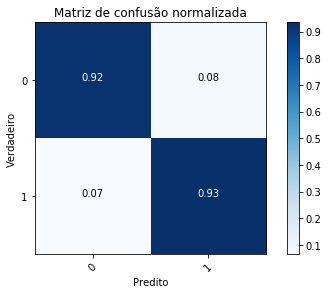

In [74]:
class_names = [0, 1]
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names, normalize=True,
                      title='Matriz de confusão normalizada')